<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Regularization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization in Deep Learning

Regularization is a technique used in deep learning to prevent overfitting by adding additional constraints or penalties to the loss function. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which reduces its ability to generalize to new, unseen data.

## Why Regularization is Important

- Deep neural networks are highly flexible and can model complex patterns.
- Without constraints, they can easily memorize the training data instead of learning meaningful features.
- Regularization techniques help the model generalize better by discouraging complexity.

## Common Regularization Techniques

### 1. **L1 Regularization (Lasso)**
- Adds the absolute value of weights to the loss function.
- Encourages sparsity by forcing some weights to become zero.
- Useful for feature selection.

**Modified Loss Function:**
\[
\text{Loss} = \text{Original Loss} + \lambda \sum |w|
\]

### 2. **L2 Regularization (Ridge)**
- Adds the square of the weights to the loss function.
- Encourages smaller weights overall, without forcing them to zero.

**Modified Loss Function:**
\[
\text{Loss} = \text{Original Loss} + \lambda \sum w^2
\]

### 3. **Dropout**
- Temporarily drops units (along with their connections) during training with a certain probability.
- Prevents units from co-adapting too much.
- Increases robustness and reduces overfitting.

**How it works:**
- During each training step, randomly drop a subset of neurons.
- At test time, use the full network with scaled weights.

### 4. **Early Stopping**
- Monitor performance on a validation set during training.
- Stop training when the performance starts to degrade (indicating overfitting).
- Simple and effective.

### 5. **Data Augmentation**
- Expands the training dataset by applying random transformations like rotation, scaling, flipping, etc.
- Makes the model more robust and less likely to overfit.

### 6. **Batch Normalization**
- Normalizes the inputs of each layer to have zero mean and unit variance.
- Has a regularizing effect even though it's not explicitly designed as regularization.
- Helps with faster convergence and sometimes reduces the need for other regularization methods.

## Summary

Regularization techniques are essential tools in deep learning to ensure that models do not just memorize the training data but also generalize well to unseen data. The choice of regularization depends on the specific problem, model architecture, and data characteristics.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# Generate synthetic dataset
X, y = make_moons(n_samples=2000, noise=0.3, random_state=42)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Early stopping for all models
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
# Function to create models with different regularization techniques
def create_model(model_type):
    model = Sequential()

    if model_type == "No Regularization":
        model.add(Dense(64, activation='relu', input_shape=(2,)))
        model.add(Dense(64, activation='relu'))

    elif model_type == "L2 Regularization":
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

    elif model_type == "Dropout":
        model.add(Dense(64, activation='relu', input_shape=(2,)))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))

    elif model_type == "L2 + Dropout":
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model_types = ["No Regularization", "L2 Regularization", "Dropout", "L2 + Dropout"]
histories = {}

In [19]:
# Train each model and store history
for model_type in model_types:
    print(f"Training model: {model_type}")
    model = create_model(model_type)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )
    histories[model_type] = history

Training model: No Regularization


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model: L2 Regularization
Training model: Dropout
Training model: L2 + Dropout


In [20]:
# Train each model and store history
for model_type in model_types:
    print(f"\n===== Model Summary: {model_type} =====")
    model = create_model(model_type)
    model.summary()  # Print model architecture summary

    print(f"\nTraining model: {model_type}")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )
    histories[model_type] = history


===== Model Summary: No Regularization =====


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)


Training model: No Regularization

===== Model Summary: L2 Regularization =====


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)


Training model: L2 Regularization

===== Model Summary: Dropout =====


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)


Training model: Dropout

===== Model Summary: L2 + Dropout =====


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)


Training model: L2 + Dropout


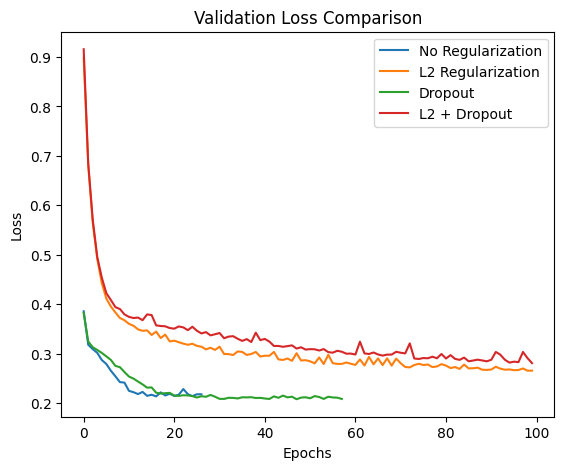

In [21]:
# Plot comparison of validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for model_type in model_types:
    plt.plot(histories[model_type].history['val_loss'], label=model_type)
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

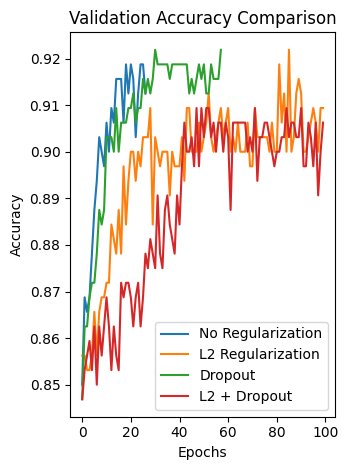

In [22]:
# Plot comparison of validation accuracy
plt.subplot(1, 2, 2)
for model_type in model_types:
    plt.plot(histories[model_type].history['val_accuracy'], label=model_type)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()